In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

### data load

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

print("")
print("train.num =", mnist.train.num_examples,
     ", test.num =", mnist.test.num_examples,
     ", validation.num =", mnist.validation.num_examples)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

### hyper parameter 

In [4]:
# Hyper-Parameter
learning_rate = 1e-3
epochs = 30
batch_size = 100

In [5]:
# 입력과 정답을 위한 플레이스홀더 정의
X = tf.placeholder(tf.float32, [None, 784])  
T = tf.placeholder(tf.float32, [None, 10])  

# 입력층의 출력 값. 컨볼루션 연산을 위해 reshape 시킴
A1 = X_img = tf.reshape(X, [-1, 28, 28, 1])  # image 28 x 28 x 1 (black / white)

### 컨볼루션층 1 5x5 32개

In [6]:
# 1번째 컨볼루션 층, 5x5x32 필터 
W2 = tf.Variable(tf.random_normal([5, 5, 1, 32], stddev=0.01))  # standard deviation 표준편차 0.01 이내로 뽑음 -> 더 정교한 데이터
b2 = tf.Variable(tf.constant(0.1, shape=[32]))

# 1번째 컨볼루션 연산을 통해 28 x 28 x 1 => 28 x 28 x 32  흑백인 1개 층이 -> 32개 층을 거치게 됨
C2 = tf.nn.conv2d(A1, W2, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z2 = tf.nn.relu(C2+b2)

# 1번째 max pooling을 통해 28 x 28 x 32 => 14 x 14 x 32  max pooling을 통해 4개를 1개로 묶어 가로 세로 2배씩 줄어들게 됨
A2 = P2 = tf.nn.max_pool(Z2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

### 완전연결층 

In [8]:
# 5 x 5 크기를 가진 32개의 activation map을 flatten 시킴
A2_flat = P2_flat = tf.reshape(A2, [-1, 14*14*32])  # 행이 몇게가 오든 열 개수만 맞춰서 나중에 y는 최종적으로 (?, 10) 의 shape가 됨

# 은닉층
W3 = tf.Variable(tf.random_normal([14*14*32, 256], stddev=0.01))
b3 = tf.Variable(tf.random_normal([256]))

Z3 = tf.matmul(A2_flat, W3) + b3

A3 = tf.nn.relu(Z3)

### 출력층

In [9]:
# 출력층
W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
b4 = tf.Variable(tf.random_normal([10]))

# 출력층 선형회귀  값 Z4, 즉 softmax 에 들어가는 입력 값
Z4 = logits = tf.matmul(A3, W4) + b4

y = A4 = tf.nn.softmax(Z4)

In [10]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = Z4, labels = T))

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)

In [11]:
# batch_size x 10 데이터에 대해 argmax를 통해 행단위로 비교함
predicted_val = tf.equal(tf.argmax(A4, 1), tf.argmax(T, 1))

# batch_size x 10 의 True, False 를 1 또는 0 으로 변환
accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

# index list 출력
accuracy_index = tf.cast(predicted_val, dtype=tf.float32)

predicted_list = tf.argmax(A4, 1)

In [12]:
index_label_false_list_1 = []

with tf.Session() as sess:  # with를 쓰면 close 하지 않아도 됨
    sess.run(tf.global_variables_initializer())  # 변수 노드 (tf.Variable) 초기화
    
    start_time = datetime.now()
    
    for i in range(epochs):  # 30번 반복 수행
        total_batch = int(mnist.train.num_examples / batch_size)  # 55000 / 100
        
        for step in range(total_batch):
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
            
            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})   
        
            if step % 100 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    
    end_time = datetime.now()
    
    print("")
    print("Elapsed Time => ", end_time-start_time)
    
    # Accuracy 확인
    test_x_data = mnist.test.images  # 10000 x 784
    test_t_data = mnist.test.labels  # 10000 x 10
    
    accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict={X: test_x_data, T: test_t_data})
    
    print("\nAccuracy =", accuracy_val)
    
    index_label_list = list(index_label)
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
    
    # list type 으로 디버그
    temp_list = [] 
    
    for index in range(len(index_label_list)):
        
        if index_label_list[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_false_list_1.append(temp_list)
            
            temp_list = []
            
    print("\nlength of index_label_false_list_1", len(index_label_false_list_1))

epochs =  0 , step =  0 , loss_val =  3.001625
epochs =  0 , step =  100 , loss_val =  0.4168327
epochs =  0 , step =  200 , loss_val =  0.1578634
epochs =  0 , step =  300 , loss_val =  0.21369287
epochs =  0 , step =  400 , loss_val =  0.28838563
epochs =  0 , step =  500 , loss_val =  0.099891044
epochs =  1 , step =  0 , loss_val =  0.0688131
epochs =  1 , step =  100 , loss_val =  0.04921338
epochs =  1 , step =  200 , loss_val =  0.11635217
epochs =  1 , step =  300 , loss_val =  0.035960566
epochs =  1 , step =  400 , loss_val =  0.12707753
epochs =  1 , step =  500 , loss_val =  0.10507302
epochs =  2 , step =  0 , loss_val =  0.08515879
epochs =  2 , step =  100 , loss_val =  0.01818411
epochs =  2 , step =  200 , loss_val =  0.027092127
epochs =  2 , step =  300 , loss_val =  0.0656172
epochs =  2 , step =  400 , loss_val =  0.007654901
epochs =  2 , step =  500 , loss_val =  0.016052192
epochs =  3 , step =  0 , loss_val =  0.011870658
epochs =  3 , step =  100 , loss_val = 

epochs =  26 , step =  0 , loss_val =  2.3918592e-05
epochs =  26 , step =  100 , loss_val =  6.461652e-05
epochs =  26 , step =  200 , loss_val =  0.0010828816
epochs =  26 , step =  300 , loss_val =  0.0011622364
epochs =  26 , step =  400 , loss_val =  0.0019320026
epochs =  26 , step =  500 , loss_val =  0.031969048
epochs =  27 , step =  0 , loss_val =  0.006352576
epochs =  27 , step =  100 , loss_val =  8.574289e-05
epochs =  27 , step =  200 , loss_val =  0.00016445149
epochs =  27 , step =  300 , loss_val =  0.00557054
epochs =  27 , step =  400 , loss_val =  4.4550943e-05
epochs =  27 , step =  500 , loss_val =  0.004915953
epochs =  28 , step =  0 , loss_val =  0.0009831644
epochs =  28 , step =  100 , loss_val =  0.0005264451
epochs =  28 , step =  200 , loss_val =  0.0005189429
epochs =  28 , step =  300 , loss_val =  0.13080058
epochs =  28 , step =  400 , loss_val =  0.0073313294
epochs =  28 , step =  500 , loss_val =  8.189981e-05
epochs =  29 , step =  0 , loss_val = 

In [13]:
print(index_label_false_list_1)

[[115, 4, 9], [211, 5, 3], [247, 4, 6], [321, 2, 7], [340, 5, 3], [445, 6, 0], [492, 2, 8], [543, 8, 3], [582, 8, 2], [583, 2, 7], [619, 1, 8], [646, 2, 6], [659, 2, 1], [684, 7, 3], [839, 8, 3], [844, 8, 7], [900, 1, 3], [947, 8, 9], [956, 1, 3], [1014, 6, 5], [1033, 8, 1], [1039, 7, 3], [1112, 4, 6], [1182, 6, 5], [1187, 2, 1], [1226, 7, 2], [1232, 9, 4], [1242, 4, 9], [1260, 7, 1], [1319, 8, 3], [1393, 5, 3], [1500, 7, 3], [1522, 7, 9], [1530, 8, 7], [1553, 9, 3], [1709, 9, 3], [1790, 2, 7], [1878, 8, 3], [1901, 9, 4], [2035, 5, 3], [2070, 7, 9], [2118, 6, 0], [2130, 4, 9], [2135, 6, 1], [2293, 9, 4], [2369, 5, 3], [2437, 2, 1], [2488, 2, 4], [2582, 9, 3], [2597, 5, 3], [2648, 9, 8], [2654, 6, 1], [2810, 5, 3], [2896, 8, 0], [2921, 3, 2], [2939, 9, 5], [2953, 3, 5], [2970, 5, 3], [2995, 6, 5], [3100, 5, 3], [3289, 8, 9], [3451, 7, 9], [3503, 9, 1], [3520, 6, 4], [3534, 4, 8], [3558, 5, 3], [3626, 8, 3], [3662, 8, 3], [3681, 2, 3], [3727, 8, 3], [3794, 8, 3], [3808, 7, 8], [3902, 5, 

### 파일로 이미지 저장

In [25]:
# check false data
import os

save_count = 0

# 현재 디렉토리 저장
curr_dir = os.getcwd()
print(curr_dir)

C:\Users\YUSEUNG\OneDrive - konkuk.ac.kr\DESKTOP\AI 기본과정\실습\16일차_1124


10 image is saved now
20 image is saved now
30 image is saved now
40 image is saved now
50 image is saved now
60 image is saved now
Elapsed save time =>  0:00:16.261903
Total  62  data is saved


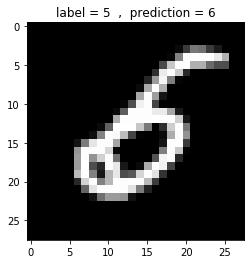

In [26]:
# image 저장할 디렉토리 생성. 현재 시간으로 생성
now = datetime.now()
algorithm_name = 'false_data_실습5'
save_dir_name = algorithm_name + '_' + str(now.year) + str(now.month) + str(now.day) + '_' + str(now.hour) + str(now.minute) + str(now.second)

os.chdir(curr_dir)
os.mkdir(save_dir_name)

# change dir
os.chdir(save_dir_name)

start_time = datetime.now()

for list_data in index_label_false_list_1:
    
    index_int = list_data[0]
    label_int = list_data[1]
    prediction_int = list_data[2]
        
    # 저장할 이미지를 인덱스를 이용하여 가져옴
    img = test_x_data[index_int].reshape(28,28)  
    plt.imshow(img, cmap='gray')
    
    # 정답 문자열
    label_str = str(label_int)
    
    # 예측값 문자열
    prediction_str = str(prediction_int)
    
    # 정답과 오답을 나타내는 문자열
    label_prediction_str = 'label = ' + label_str + '  ,  prediction = ' + prediction_str
    
    # 저장 파일 이름 생성, str(index_int).png
    save_image_name = str(index_int) + '.png'
    
    plt.title(label_prediction_str)
    plt.savefig(save_image_name)
    
    save_count += 1
    
    if save_count % 10 == 0:
        
        print(save_count, 'image is saved now')

    
end_time = datetime.now()

print('Elapsed save time => ', end_time - start_time)
print('Total ', save_count, " data is saved")

# 원래의 dir 로 복귀
os.chdir(curr_dir)